In [1]:
# Importing the necessary libraries
import numpy as np  # Library for numerical computations and array manipulations
import matplotlib.pyplot as plt  # Library for data visualization
import pandas as pd  # Library for handling datasets

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')  # Loading data from a CSV file
X = dataset.iloc[:, [2, 3]].values  # Selecting columns 2 and 3 (Age and Estimated Salary) as features
y = dataset.iloc[:, 4].values  # Selecting column 4 (Purchased: 0 or 1) as the target variable

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split  # Importing the function to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# 75% of the data is used for training, 25% for testing
# `random_state=0` ensures reproducibility of results

In [4]:
# Feature Scaling (Normalizing the data)
from sklearn.preprocessing import StandardScaler  # Importing the scaler for feature normalization
sc_X = StandardScaler()  # Creating a StandardScaler object
X_train = sc_X.fit_transform(X_train)  # Normalizing the training data
X_test = sc_X.transform(X_test)  # Normalizing the test data (without re-fitting)

In [5]:
# Training the SVM classifier on the Training set
from sklearn.svm import SVC  # Importing the Support Vector Classifier (SVC)
classifier = SVC(kernel='linear', random_state=0)  # Creating an SVM model with a linear kernel
classifier.fit(X_train, y_train)  # Training the model on the training data


SVC(kernel='linear', random_state=0)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)  # Making predictions for the test data

In [7]:
# Creating the confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix  # Importing the confusion matrix function
cm = confusion_matrix(y_test, y_pred)  # Generating the confusion matrix

<ipython-input-8-fcaf4b8b7684>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


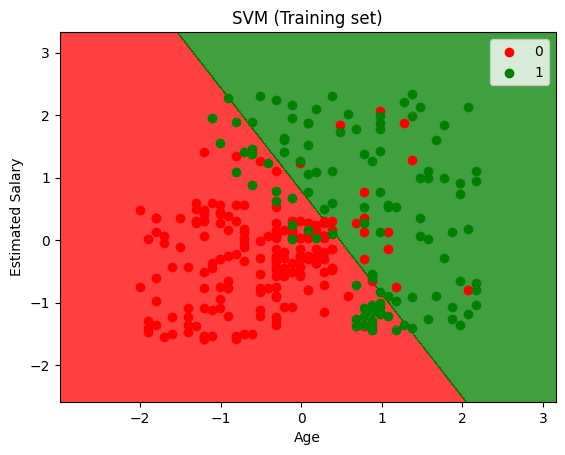

In [8]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap  # Importing color mapping for visualization
X_set, y_set = X_train, y_train  # Assigning training data for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
# Creating a grid of points to visualize the decision boundary

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
# Displaying the decision boundary as colored regions

plt.xlim(X1.min(), X1.max())  # Setting the x-axis limits
plt.ylim(X2.min(), X2.max())  # Setting the y-axis limits

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
# Plotting the training points with different colors for each class

plt.title('SVM (Training set)')  # Title of the plot
plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Estimated Salary')  # Label for y-axis
plt.legend()  # Displaying the legend
plt.show()  # Showing the plot

<ipython-input-9-43aa09d1554e>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


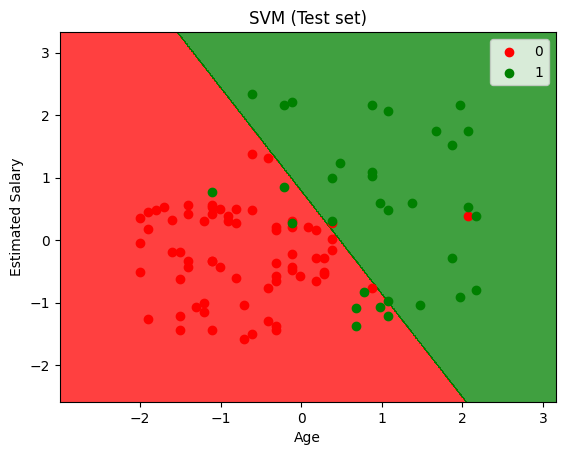

In [9]:
# Visualizing the Test set results
X_set, y_set = X_test, y_test  # Assigning test data for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
# Creating a grid of points to visualize the decision boundary on the test set

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
# Displaying the decision boundary

plt.xlim(X1.min(), X1.max())  # Setting the x-axis limits
plt.ylim(X2.min(), X2.max())  # Setting the y-axis limits

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
# Plotting the test points with different colors for each class

plt.title('SVM (Test set)')  # Title of the plot
plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Estimated Salary')  # Label for y-axis
plt.legend()  # Displaying the legend
plt.show()  # Showing the plot

#Selects Age and Estimated Salary as features and Purchased (0 or 1) as the target.
#Splits the dataset into training (75%) and test (25%) sets.
#Normalizes the data to ensure that all features contribute equally to the model.
#Trains an SVM classifier with a linear kernel on the training set.
#Makes predictions on the test set.
#Evaluates the model using a confusion matrix.
#Visualizes the decision boundary of the SVM for both training and test sets.
